

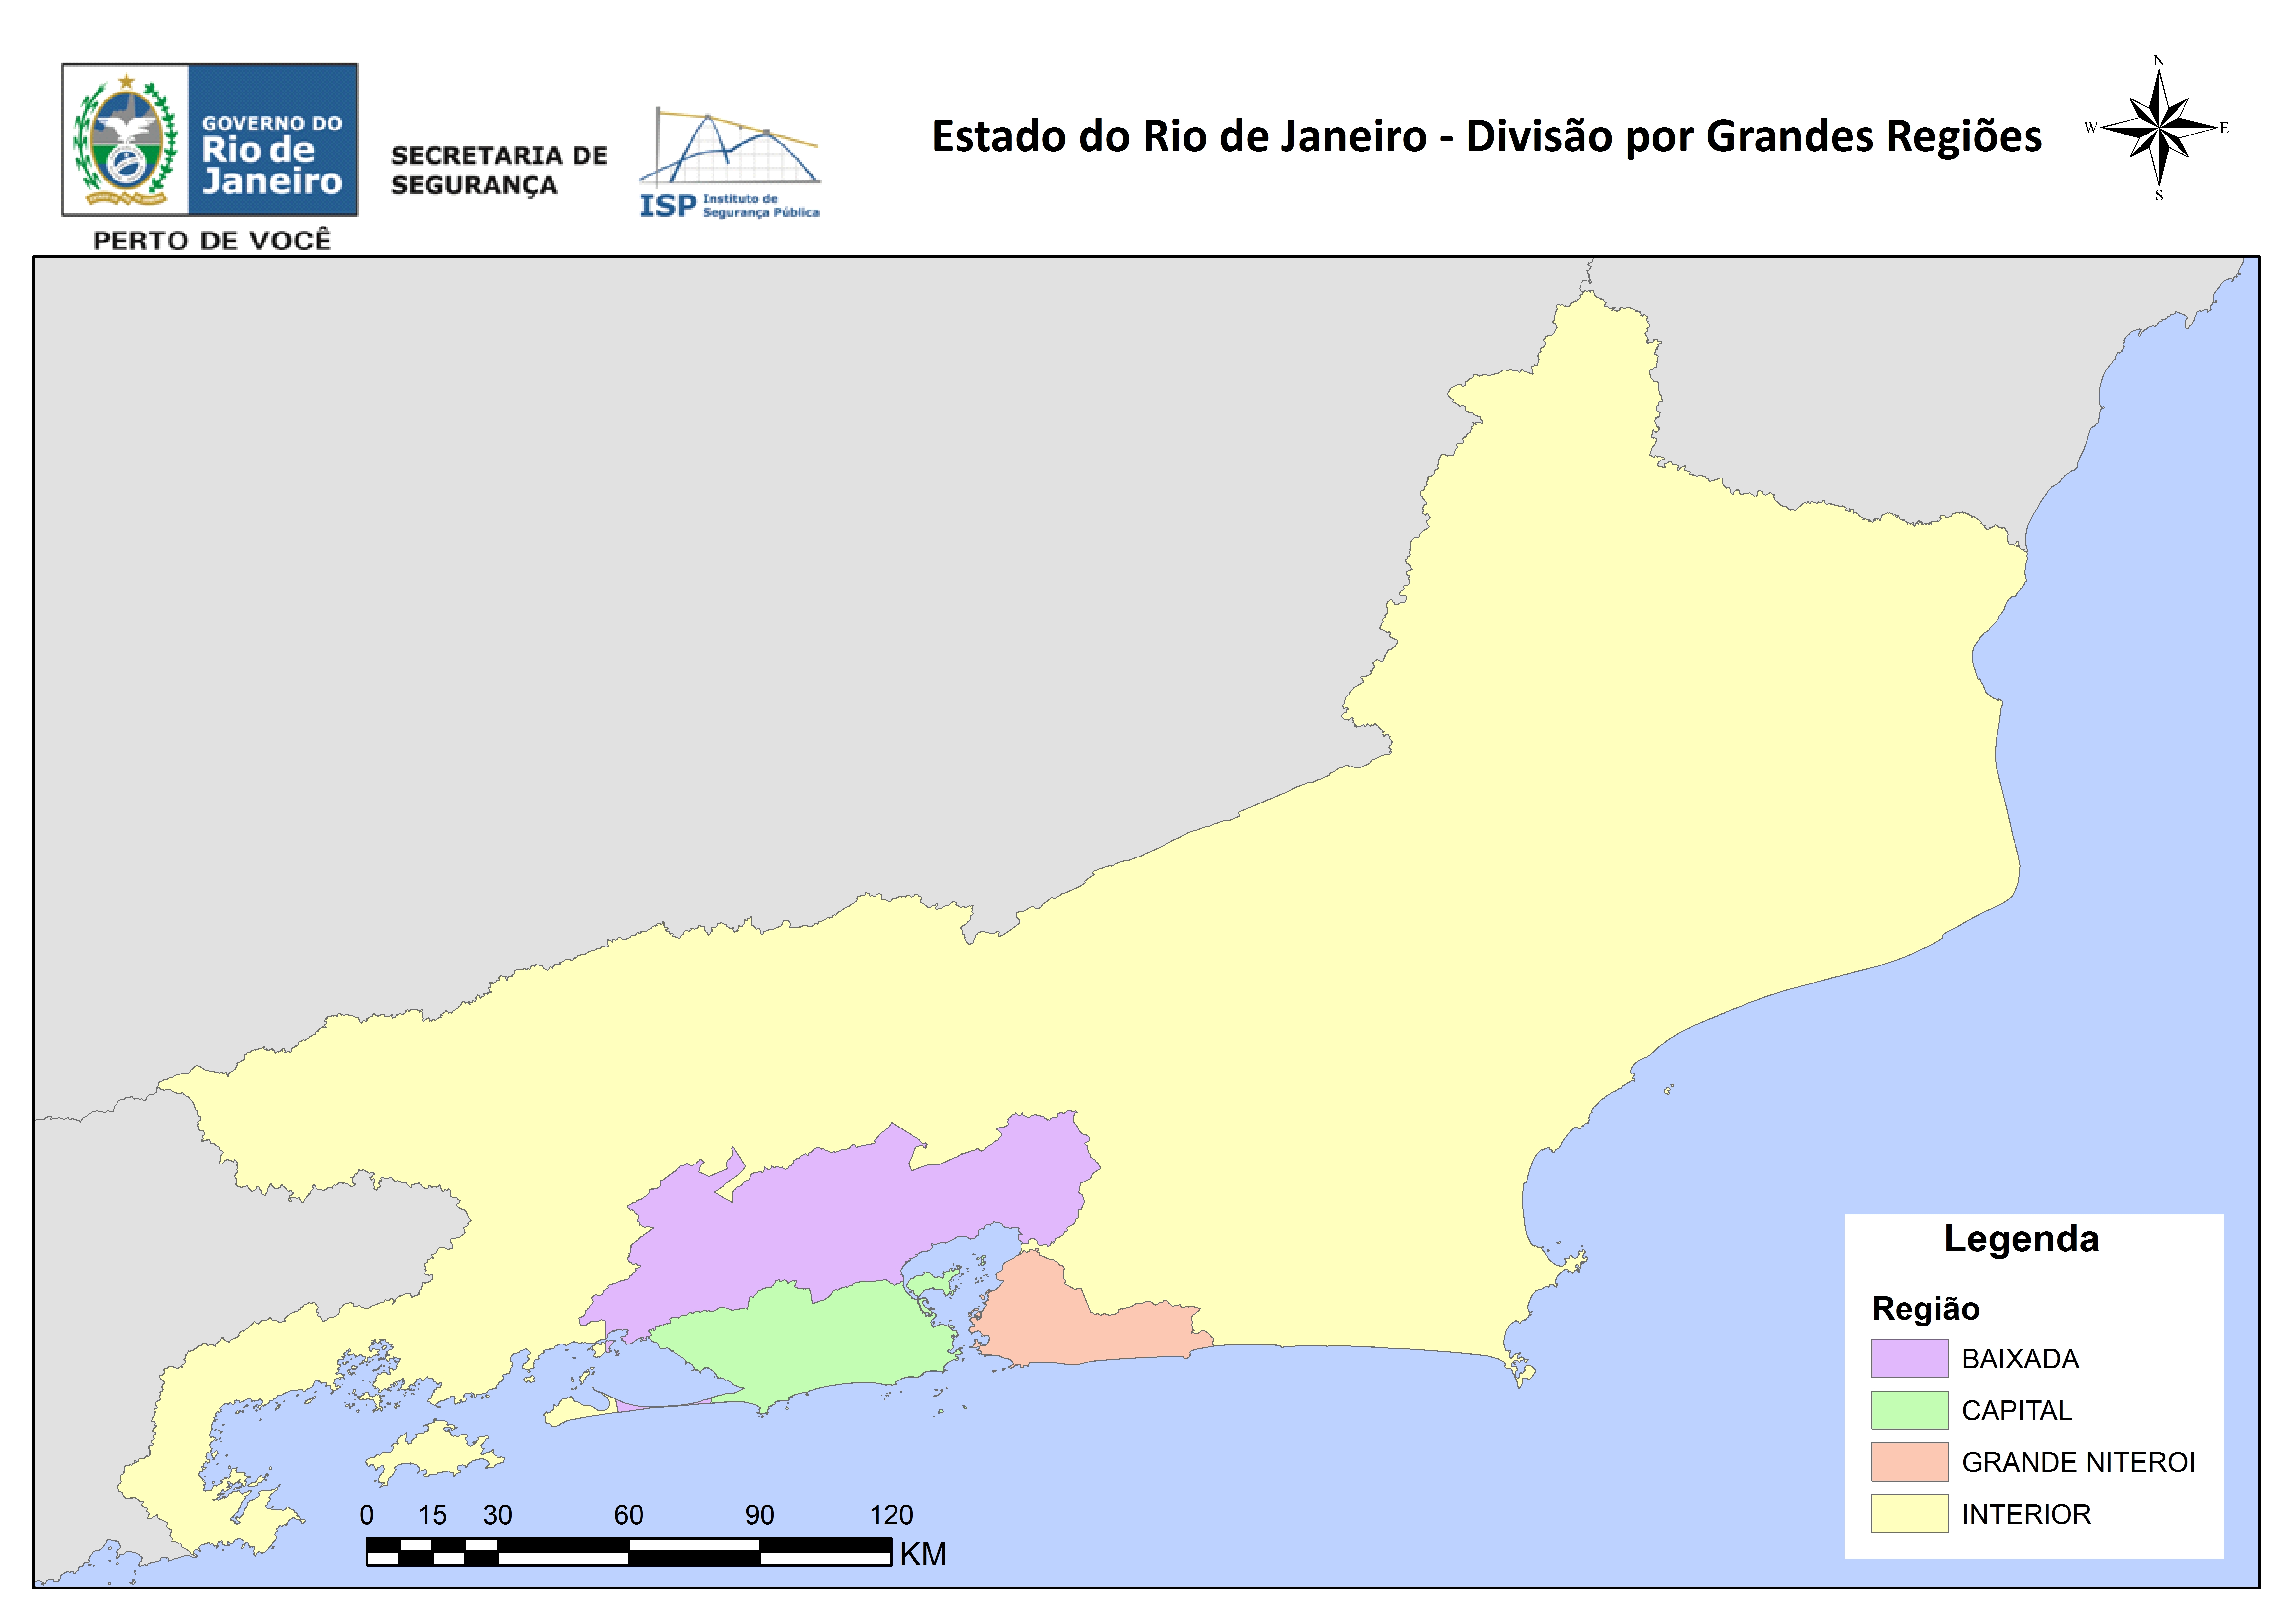

In [ ]:
!pip install basedosdados
!pip install matplotlib
!pip install seaborn

In [57]:
import pandas as pd
import basedosdados as bd
import matplotlib.pyplot as plt
import seaborn as sns
df = bd.read_table(dataset_id='br_isp_estatisticas_seguranca',
table_id='taxa_evolucao_anual_municipio',
billing_project_id="basedosdados-dev")

Downloading: 100%|██████████| 644/644 [00:00<00:00, 1053.15rows/s]


In [58]:
# Reorganizando as colunas
df = df[['ano', 
       'id_municipio',
       'municipio',
       'regiao_rj',
       'hom_doloso',
       'hom_culposo',
       'hom_por_interv_policial',
       'pol_militares_mortos_serv']]

In [59]:
df_regiao_doloso = df['hom_doloso'].value_counts().reset_index()
df_regiao_doloso = df.groupby('regiao_rj')[['hom_doloso']].sum().reset_index()
df_regiao_doloso['porcentagem']  = round(df_regiao_doloso['hom_doloso'] / df_regiao_doloso['hom_doloso'].sum()*100,2)
round(df_regiao_doloso.sort_values('porcentagem', ascending = False),1)

,regiao_rj,hom_doloso,porcentagem
3,interior,4099.6,47.6
0,baixada fluminense,3807.1,44.2
2,grande niteroi,576.4,6.7
1,capital,132.1,1.5


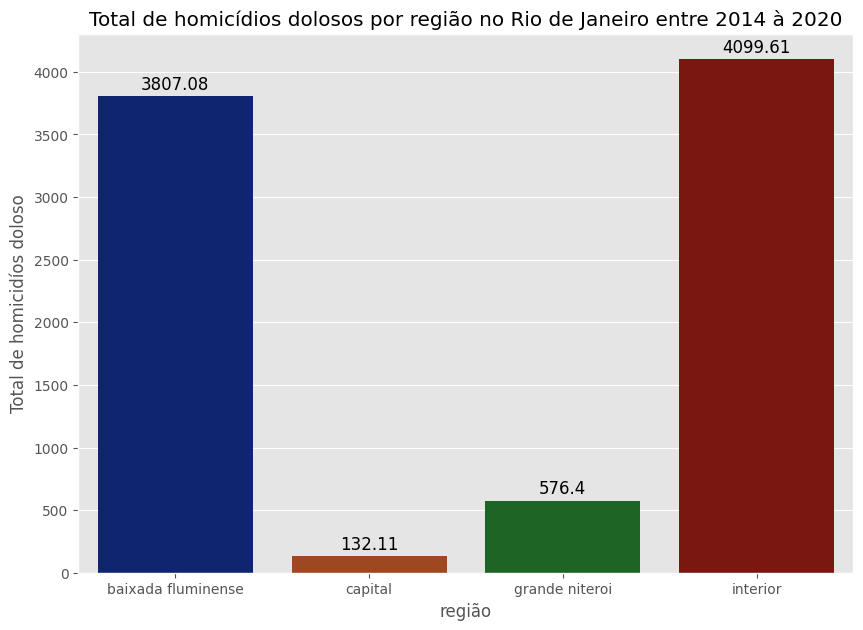

In [60]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7)) 

plot = sns.barplot(data=df_regiao_doloso,
            x = 'regiao_rj',
            y = 'hom_doloso',
            palette='dark',
            linewidth=0.5)

for x in plot.patches:
  plot.annotate(x.get_height(),
                (x.get_x() + x.get_width() / 2, x.get_height()),
                ha='center', va = 'baseline', fontsize=12,
                color='black', xytext=(0,5),
                textcoords='offset points'
                )

plt.xlabel('região')
plt.ylabel('Total de homicidíos doloso')
plt.title('Total de homicídios dolosos por região no Rio de Janeiro entre 2014 à 2020')

plt.show()

### Analise a partir da baixada Fluminense

In [61]:
df_baixada = df.query('regiao_rj == "baixada fluminense"')
df_baixada.head()

,ano,id_municipio,municipio,regiao_rj,hom_doloso,hom_culposo,hom_por_interv_policial,pol_militares_mortos_serv
56,2014,3300456,belford roxo,baixada fluminense,48.40,3.34,13.35,0.00
57,2015,3300456,belford roxo,baixada fluminense,35.96,3.12,9.77,0.00
58,2016,3300456,belford roxo,baixada fluminense,41.89,1.82,10.73,6.51
59,2017,3300456,belford roxo,baixada fluminense,52.04,4.24,6.25,2.15
60,2018,3300456,belford roxo,baixada fluminense,41.68,4.72,18.28,2.22


In [133]:
df_baixada_hom_doloso = df_baixada['hom_doloso'].value_counts().reset_index
df_baixada_hom_doloso = round(df_baixada.groupby('ano')[['hom_doloso']].mean().reset_index().sort_values('hom_doloso', ascending=False),2)
df_baixada_hom_doloso

,ano,hom_doloso
2,2016,55.22
0,2014,52.02
3,2017,47.28
1,2015,44.28
4,2018,40.09
5,2019,28.59
6,2020,25.38


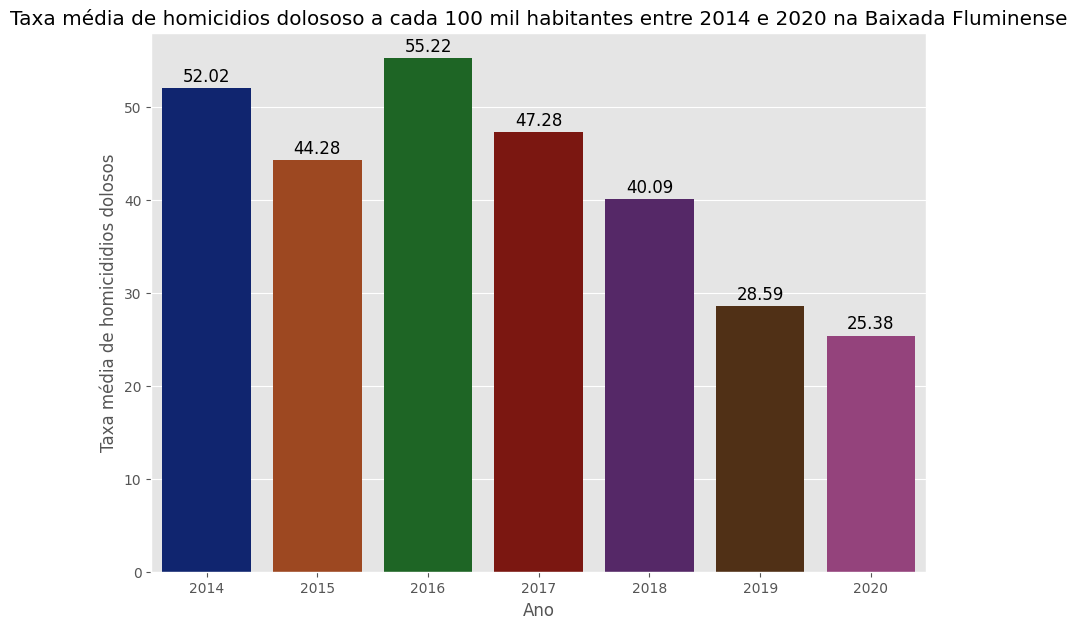

In [134]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7)) 

plot = sns.barplot(data=df_baixada_hom_doloso,
            x = 'ano',
            y = 'hom_doloso',
            palette='dark',
            linewidth=0.5)

for x in plot.patches:
  plot.annotate(x.get_height(),
                (x.get_x() + x.get_width() / 2, x.get_height()),
                ha='center', va = 'baseline', fontsize=12,
                color='black', xytext=(0,5),
                textcoords='offset points'
                )

plt.xlabel('Ano')
plt.ylabel('Taxa média de homicididios dolosos')
plt.title('Taxa média de homicidios dolososo a cada 100 mil habitantes entre 2014 e 2020 na Baixada Fluminense')

plt.show()

* Nota-se uma queda durantes os anos da taxa média de homicidios dolosos na baixada fluminense, queda de mais de 50%.

In [135]:
df_baixada_municipio = round(df_baixada.groupby('municipio')[['hom_doloso']].mean().reset_index().sort_values(by='hom_doloso', ascending=False),2)
df_baixada_municipio

,municipio,hom_doloso
10,queimados,71.07
4,japeri,54.68
3,itaguai,47.78
8,nova iguacu,45.70
12,seropedica,44.49
2,guapimirim,43.57
0,belford roxo,41.53
1,duque de caxias,38.96
5,mage,38.77
9,paracambi,32.61


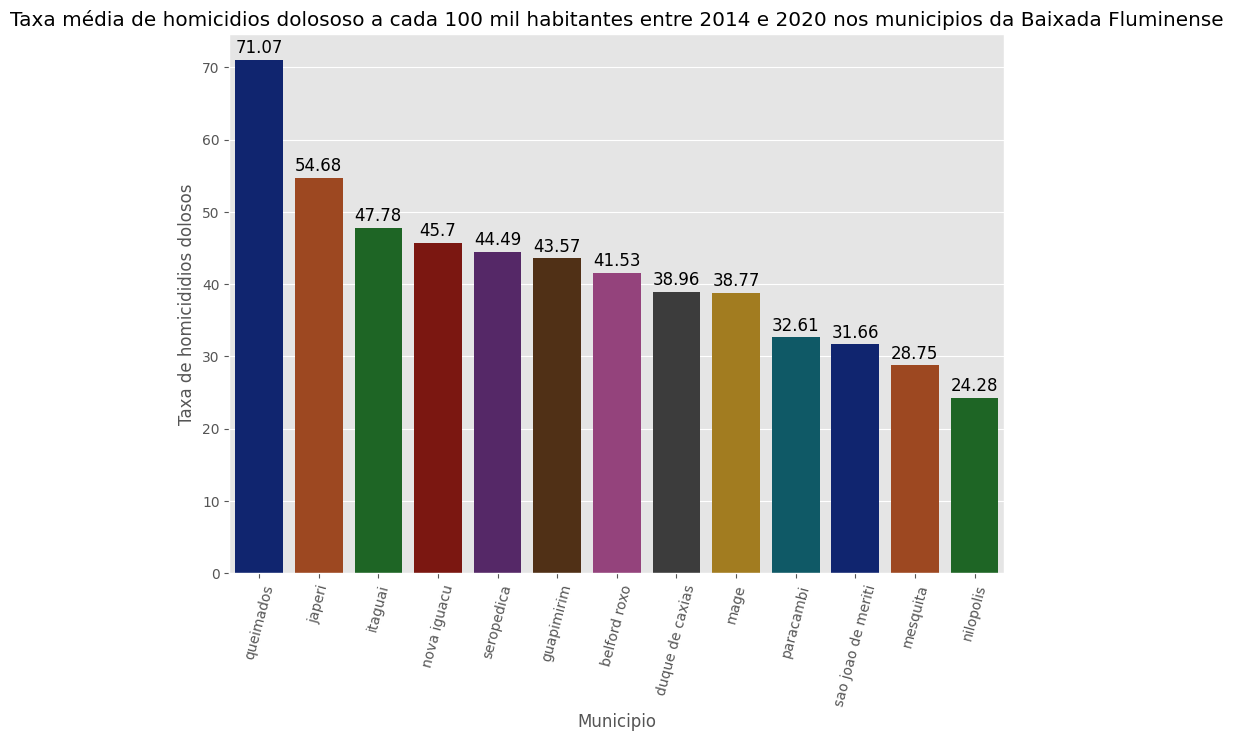

In [137]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7)) 

plot = sns.barplot(data=df_baixada_municipio,
            x='municipio',
            y='hom_doloso',
            palette='dark',
            linewidth=0.5)

for x in plot.patches:
  plot.annotate(x.get_height(),
                (x.get_x() + x.get_width() / 2, x.get_height()),
                ha='center', va = 'baseline', fontsize=12,
                color='black', xytext=(0,5),
                textcoords='offset points'
                )

plt.xticks(rotation = 75)
plt.ylabel('Taxa de homicididios dolosos')
plt.xlabel('Municipio')
plt.title('Taxa média de homicidios dolososo a cada 100 mil habitantes entre 2014 e 2020 nos municipios da Baixada Fluminense')
plt.show()

* Relacionado a taxa de homicidios dolosos nos municipios da baixada Fluminense, Queimados lidera os números, seguido de Japeri, Itaguai e Nova Iguaçu. 





# Analise de homicidio culposo.

### Indice de homício culposo por região na Baixada Fluminense

In [66]:
df_baixada_hom_culposo = round(df_baixada.groupby('ano')[['hom_culposo']].mean().reset_index(),2)
df_baixada_hom_culposo.sort_values('hom_culposo', ascending=False)

,ano,hom_culposo
3,2017,13.75
5,2019,12.55
2,2016,12.32
4,2018,11.30
0,2014,11.03
1,2015,10.40
6,2020,8.84


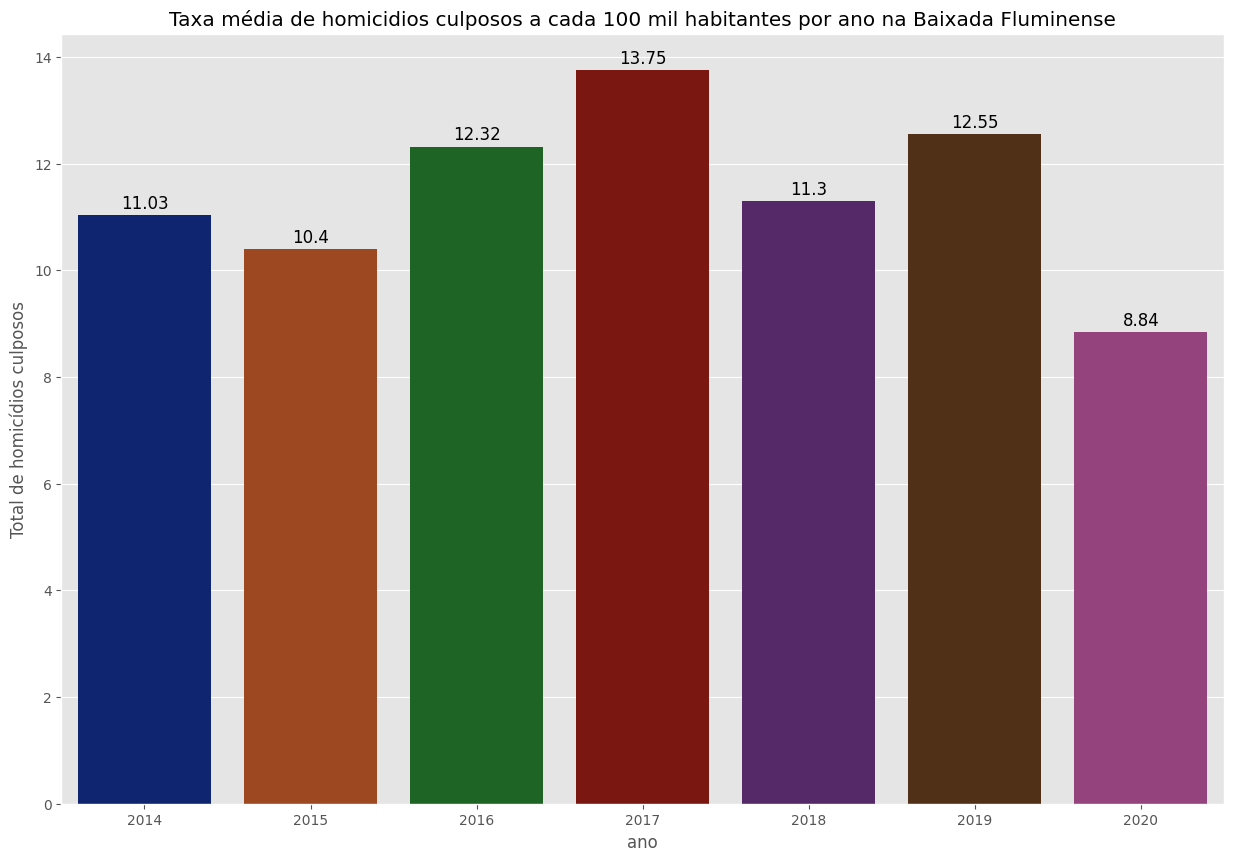

In [140]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10)) 

plot = sns.barplot(data=df_baixada_hom_culposo,
            x = 'ano',
            y = 'hom_culposo',
            palette='dark',
            linewidth=0.5)

for x in plot.patches:
  plot.annotate(x.get_height(),
                (x.get_x() + x.get_width() / 2, x.get_height()),
                ha='center', va = 'baseline', fontsize=12,
                color='black', xytext=(0,5),
                textcoords='offset points'
                )

plt.xlabel('ano')
plt.ylabel('Total de homicídios culposos')
plt.title('Taxa média de homicidios culposos a cada 100 mil habitantes por ano na Baixada Fluminense')

plt.show()

`taxa de homicídios culposos na baixada fluminense`


* Percebemos que os dados referente a Baixada Fluminense baixada tem pouca variação durante os anos.






In [80]:
df_baixada_municipio = round(df_baixada.groupby('municipio')[['hom_culposo']].mean().reset_index().sort_values('hom_culposo', ascending=False), 2)
df_baixada_municipio

,municipio,hom_culposo
2,guapimirim,29.56
12,seropedica,23.77
3,itaguai,20.18
1,duque de caxias,10.58
8,nova iguacu,10.52
10,queimados,10.13
5,mage,8.84
9,paracambi,8.75
4,japeri,7.22
11,sao joao de meriti,5.57


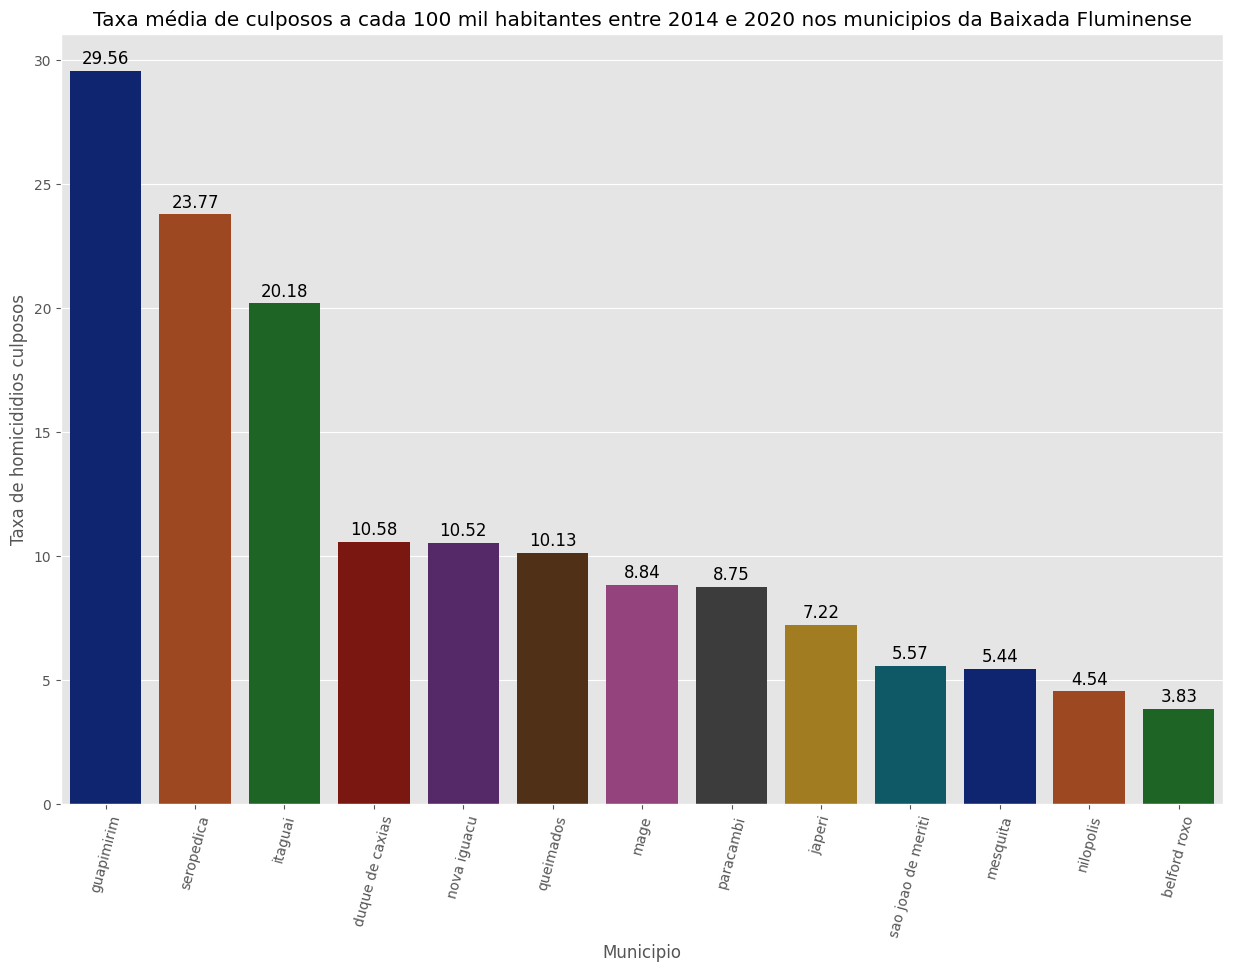

In [129]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

plot = sns.barplot(data=df_baixada_municipio,
            x='municipio',
            y='hom_culposo',
            palette='dark',
            linewidth=0.5)

for x in plot.patches:
  plot.annotate(x.get_height(),
                (x.get_x() + x.get_width() / 2, x.get_height()),
                ha='center', va = 'baseline', fontsize=12,
                color='black', xytext=(0,5),
                textcoords='offset points'
                )

plt.xticks(rotation = 75)
plt.ylabel('Taxa de homicididios culposos')
plt.xlabel('Municipio')
plt.title('Taxa média de culposos a cada 100 mil habitantes entre 2014 e 2020 nos municipios da Baixada Fluminense')
plt.show()

* A taxa média de homicídios culposos na Baixada Fluminense é liberado por Guapimirim, seguida por Seropédica, Itaguai e Duque de Caxias.

### Olhando para a taxa de Policiais mortos em serviço na Baixada

In [112]:
df_pol_mortos_ano = df_baixada[['ano', 'regiao_rj','municipio', 'pol_militares_mortos_serv']]
df_pol_mortos_ano_media = round(df_pol_mortos_ano.groupby('ano')[['pol_militares_mortos_serv']].mean().reset_index(), 2)
df_pol_mortos_ano_media = df_pol_mortos_ano_media.query("ano != 2014")

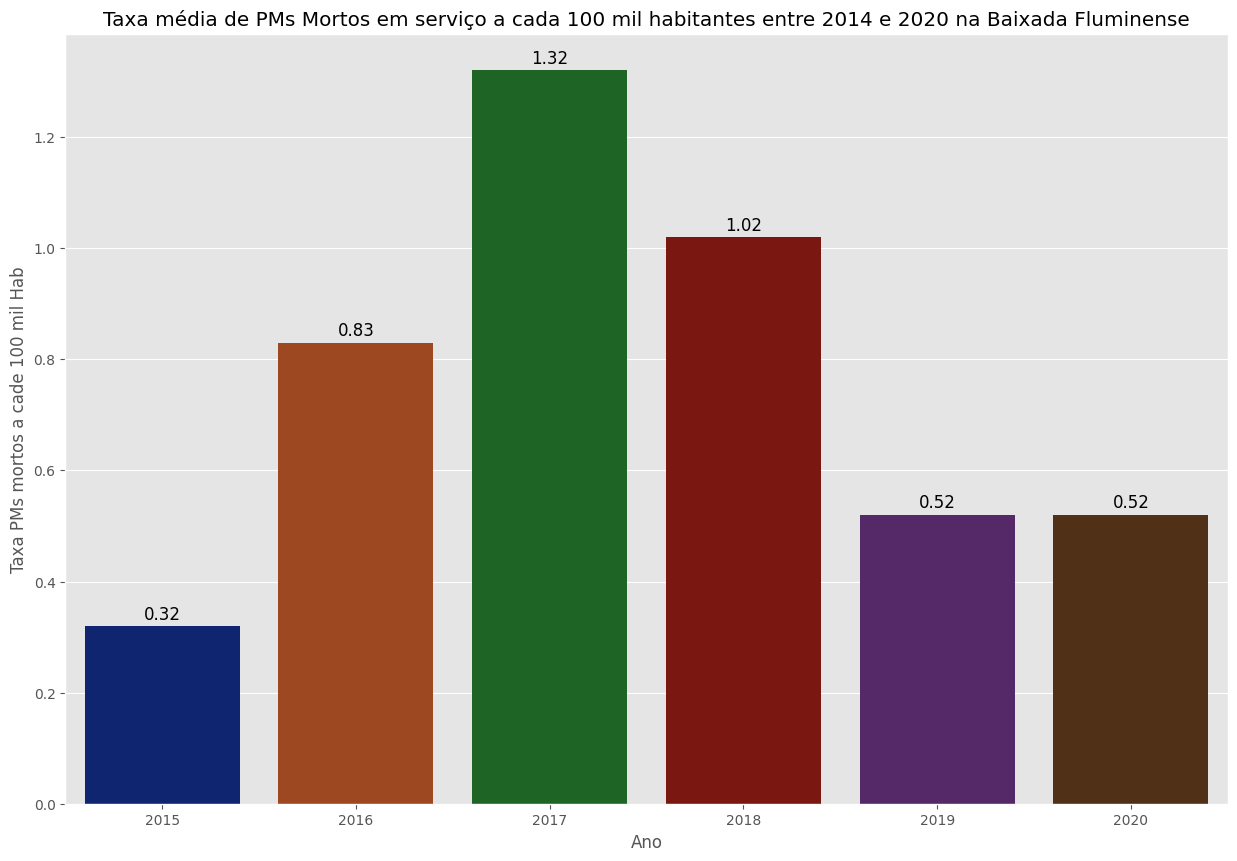

In [148]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

plot = sns.barplot(data = df_pol_mortos_ano_media,
            x = 'ano', y = 'pol_militares_mortos_serv', palette='dark', ci=None)

for x in plot.patches:
  plot.annotate(x.get_height(),
                (x.get_x() + x.get_width() / 2, x.get_height()),
                ha='center', va = 'baseline', fontsize=12,
                color='black', xytext=(0,5),
                textcoords='offset points'
                )
  
plt.xlabel('Ano')
plt.ylabel('Taxa PMs mortos a cade 100 mil Hab')
plt.title('Taxa média de PMs Mortos em serviço a cada 100 mil habitantes entre 2014 e 2020 na Baixada Fluminense')
plt.show()

* Sobre dados de policias militares mortos na baixada fluminense, após um aumento de 2015 até o ano de 2018, há uma queda significa no ano de 2019 e o número se mantém em 2020.

In [146]:
df_pol_mortos_municipio_media = round(df_pol_mortos_ano.groupby('municipio')[['pol_militares_mortos_serv']].mean().reset_index(), 2)
df_pol_mortos_municipio_media = df_pol_mortos_municipio_media.sort_values('pol_militares_mortos_serv', ascending=False)
df_pol_mortos_municipio_media = df_pol_mortos_municipio_media.query("pol_militares_mortos_serv != 0.00")
df_pol_mortos_municipio_media

,municipio,pol_militares_mortos_serv
1,duque de caxias,2.17
0,belford roxo,1.88
10,queimados,0.95
11,sao joao de meriti,0.95
8,nova iguacu,0.92
3,itaguai,0.64
4,japeri,0.62
5,mage,0.31


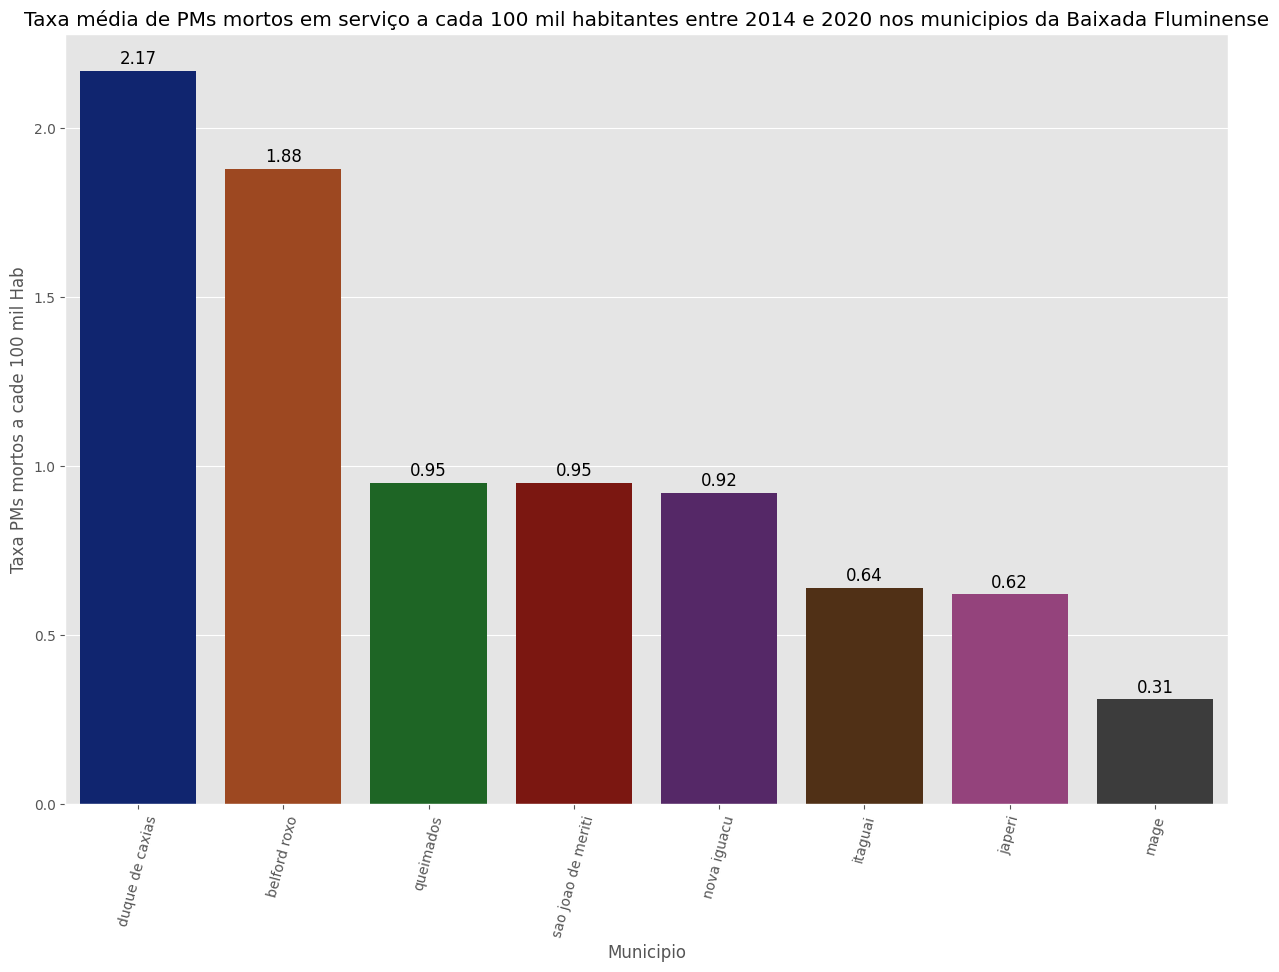

In [149]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

plot = sns.barplot(data = df_pol_mortos_municipio_media,
            x = 'municipio', y = 'pol_militares_mortos_serv', palette='dark', ci=None)

for x in plot.patches:
  plot.annotate(x.get_height(),
                (x.get_x() + x.get_width() / 2, x.get_height()),
                ha='center', va = 'baseline', fontsize=12,
                color='black', xytext=(0,5),
                textcoords='offset points'
                )
  
plt.xlabel('Municipio')
plt.ylabel('Taxa PMs mortos a cade 100 mil Hab')
plt.title('Taxa média de PMs mortos em serviço a cada 100 mil habitantes entre 2014 e 2020 nos municipios da Baixada Fluminense')
plt.xticks(rotation = 75)
plt.show()

* Duque de Caxias, Belford Roxo e Queimados são os municipios que mais matam policias em serviço entre os anos de 2015 à 2020.